# Final Assignment

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `data` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [3]:
food = pd.read_csv('data/food_consumption.csv')
food.sample(10)

,country,food_category,consumption,co2_emission
581,Ecuador,soybeans,0.00,0.00
227,French Polynesia,wheat,68.67,13.10
189,Canada,beef,30.25,933.45
65,USA,nuts,7.86,13.91
1024,Jamaica,poultry,52.51,56.41
98,Brazil,nuts,0.67,1.19
311,Italy,lamb_goat,0.92,32.22
1157,Nicaragua,beef,4.73,145.96
415,Germany,rice,3.34,4.27
134,Denmark,beef,28.46,878.22


In [4]:
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [6]:
food_description = food.groupby('food_category')['consumption'].describe()
food_description

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [7]:
highest_median_value = food_description[food_description['50%'] == food_description['50%'].max()].index[0]
highest_median_value

'dairy'

#### *The food category with the highest median value of food_consumption is dairy*

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

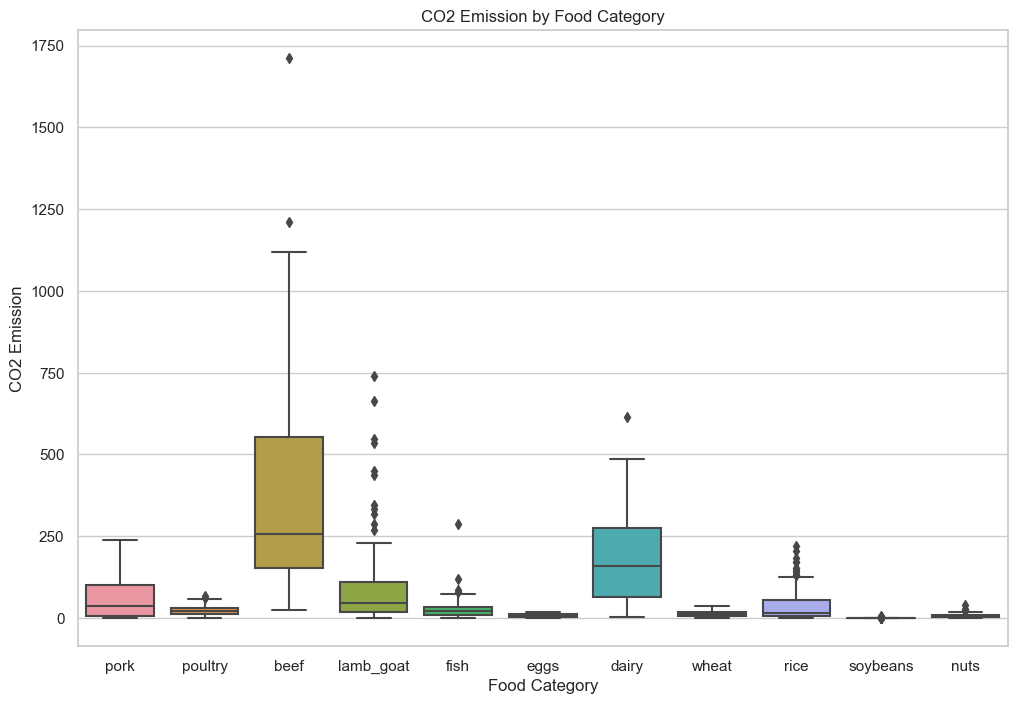

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='food_category', y='co2_emission', data=food)
plt.title('CO2 Emission by Food Category')
plt.xlabel('Food Category')
plt.ylabel('CO2 Emission')

plt.show()

In [9]:
gbf = food.groupby('food_category')

for i, frame in gbf:
    iqr = frame.co2_emission.quantile(0.75) - frame.co2_emission.quantile(0.25)
    print(i, iqr)

beef 399.37749999999994
dairy 209.2725
eggs 7.6850000000000005
fish 25.27
lamb_goat 89.03750000000001
nuts 6.734999999999999
pork 92.52
poultry 20.230000000000004
rice 49.55
soybeans 0.29
wheat 12.645000000000001


### *Beef is the food_category that has the highest interquartile range with a value of 399.377*

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [10]:
for i, frame in gbf:
    median = frame.co2_emission.quantile(0.5)
    print(i, median)

beef 255.655
dairy 158.075
eggs 7.734999999999999
fish 22.27
lamb_goat 46.405
nuts 6.1850000000000005
pork 36.650000000000006
poultry 21.325
rice 15.2
soybeans 0.035
wheat 13.24


### *Beef is the food category with the highest median: 255.655*

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [11]:
poultry_consumption = food[food['food_category'] == 'poultry']['consumption']
fish_consumption = food[food['food_category'] == 'fish']['consumption']

In [12]:
observed_difference = np.mean(poultry_consumption) - np.mean(fish_consumption)

In [13]:
combined_data = np.concatenate([poultry_consumption, fish_consumption])

In [14]:
num_permutations = 20000
permutation_differences = np.zeros(num_permutations)
for i in range(num_permutations):
    permuted_data = np.random.permutation(combined_data)
    permuted_poultry = permuted_data[:len(poultry_consumption)]
    permuted_fish = permuted_data[len(poultry_consumption):]
    permutation_differences[i] = np.mean(permuted_poultry) - np.mean(permuted_fish)

In [15]:
p_value = np.sum(permutation_differences >= observed_difference) / num_permutations
print(f"Observed difference in means: {observed_difference}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The difference is statistically significant.")
else:
    print("Fail to reject the null hypothesis. The difference is not statistically significant.")

Observed difference in means: 3.9321538461538488
P-value: 0.0287
Reject the null hypothesis. The difference is statistically significant.


### *Observed difference in means: 3.9321538461538488*
### *P-value: 0.0287*
### *Reject the null hypothesis. The difference is statistically significant.*

### Part 2

The `distributions.csv` dataset from the `data` folder contains data drawn from 7 probability distributions – one per column. Load it to a DataFrame named `distributions` and check its contents.

In [33]:
distributions = pd.read_csv('data/distributions.csv')
distributions.sample(10)

,distribution_1,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
997,False,100.000855,3.999458,888,1,-31,0.228308
96,False,100.006362,4.592940,893,2,-35,0.096580
356,False,100.005322,1.762071,889,0,-30,1.007496
30,False,100.023486,4.716322,894,1,-30,0.176046
72,False,100.000920,3.193925,904,2,-35,2.894168
924,False,99.996455,4.368640,894,2,-35,0.444630
748,False,100.013144,5.240671,887,1,-39,1.557787
529,False,99.997776,5.782785,906,1,-35,0.431814
947,False,99.983987,1.369391,904,1,-31,0.264602
626,False,99.996082,2.595587,906,2,-35,0.383730


1. Use the `.describe()` and `info()` methods on the `distributions` DataFrame to produce some preliminary information about each column. **What is the data type of each column?**

In [34]:
distributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distribution_1  1000 non-null   bool   
 1   distribution_2  1000 non-null   float64
 2   distribution_3  1000 non-null   float64
 3   distribution_4  1000 non-null   int64  
 4   distribution_5  1000 non-null   int64  
 5   distribution_6  1000 non-null   int64  
 6   distribution_7  1000 non-null   float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 48.0 KB


###  *distribution_1 = bool*
###  *distribution_2 = float64*
###  *distribution_3 = float64*
###  *distribution_4 = int64*
###  *distribution_5 = int64*
###  *distribution_6 = int64*
###  *distribution_7 = float64*

In [35]:
distributions.describe()

,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,100.000263,3.462706,899.630000,1.192000,-34.539000,0.513223
std,0.010155,1.466874,9.729531,1.091938,2.889087,0.497540
min,99.961668,1.002417,865.000000,0.000000,-39.000000,0.000033
25%,99.993916,2.223423,893.000000,0.000000,-37.000000,0.141789
50%,100.000598,3.426250,900.000000,1.000000,-34.000000,0.362279
75%,100.007031,4.679788,906.000000,2.000000,-32.000000,0.735851
max,100.034052,5.997595,929.000000,6.000000,-30.000000,3.039330


2. Loop through each column of `distributions` and for each column produce a plot to show the distribution on a separate chart.

In [36]:
def transform(x):
    if x == False:
        return 0
    else:
        return 1
distributions['distribution_1'] = distributions['distribution_1'].apply(lambda x: transform(x))

In [37]:
distributions.sample(5)

,distribution_1,distribution_2,distribution_3,distribution_4,distribution_5,distribution_6,distribution_7
90,0,99.988241,3.232981,902,1,-33,0.055145
745,0,99.998651,5.396537,905,0,-34,0.603821
82,0,99.999448,3.716758,888,1,-37,0.594429
652,0,100.013127,1.721443,911,1,-32,0.217442
220,0,100.024807,2.771371,898,6,-33,0.533280


In [38]:
distributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distribution_1  1000 non-null   int64  
 1   distribution_2  1000 non-null   float64
 2   distribution_3  1000 non-null   float64
 3   distribution_4  1000 non-null   int64  
 4   distribution_5  1000 non-null   int64  
 5   distribution_6  1000 non-null   int64  
 6   distribution_7  1000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


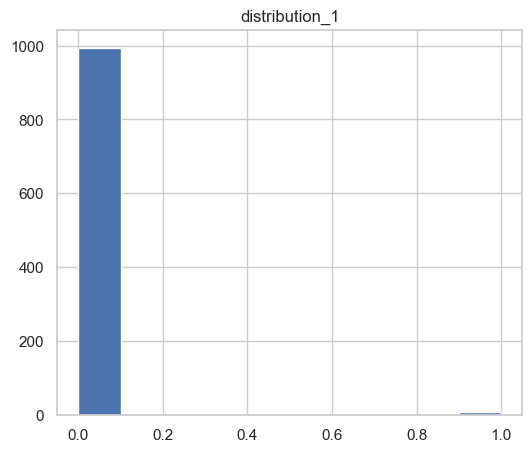

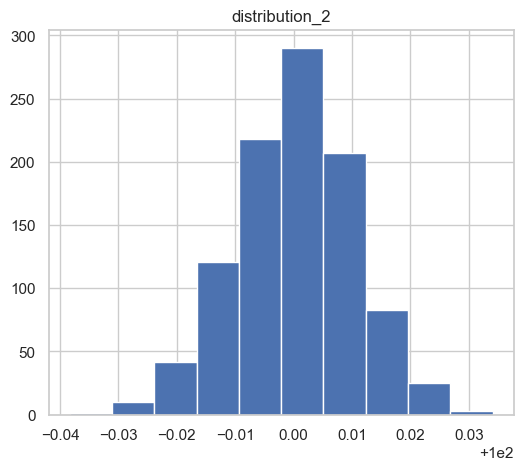

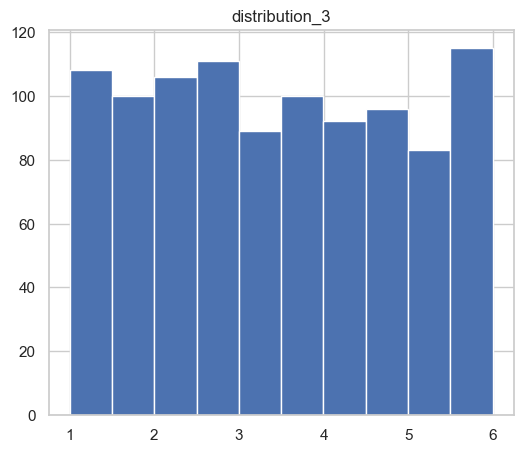

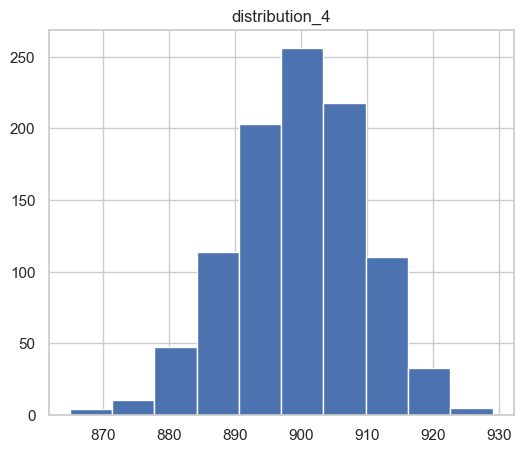

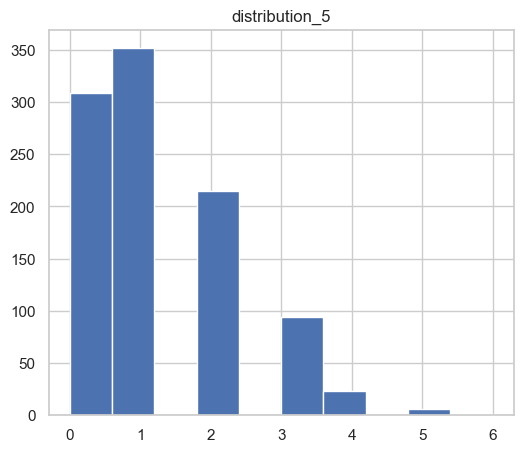

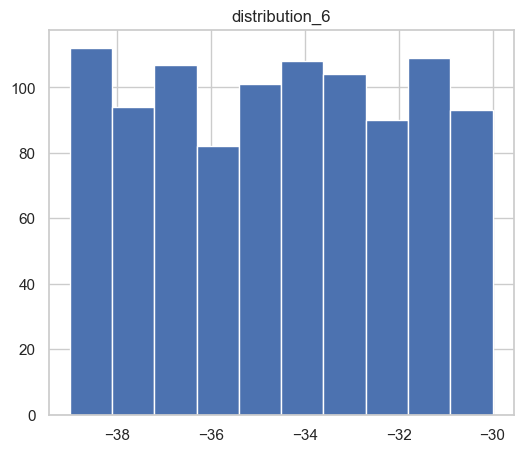

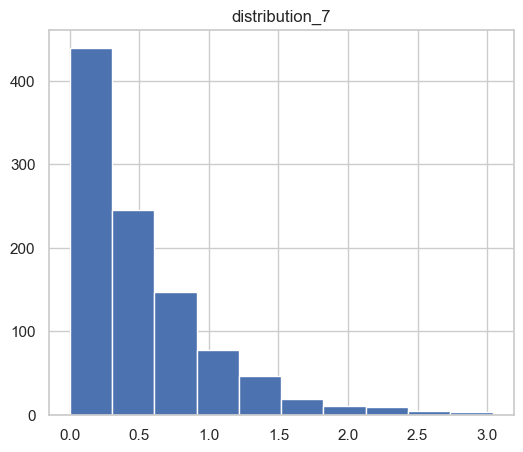

In [40]:
for i in distributions.columns:
    di = distributions[i]
    plt.figure(figsize=(6, 5))
    plt.title(i)
    plt.hist(di)
    plt.show()

3. Each column of the `distributions` dataframe contains data drawn from a different distribution. **Associate each column to its probability distribution.** This is the list of the probability distributions used (one for each column):
    - Bernoulli
    - Binomial
    - Continuous Uniform
    - Gaussian
    - Discrete Uniform
    - Poisson
    - Exponential (this was not explain in classroom, go by exclusion)

### *Bernoulli = distributions_1*
### *Binomial = distributions_4*
### *Continuous Uniform = distributions_3*
### *Gaussian = distributions_2*
### *Discrete Uniform = distributions_6*
### *Poisson = istributions_5*
### *Exponential = distributions_7*
